# Machine Learning and Statistics, Winter 21/22 Assessment - scipy.stats
***
## Notebook objectives
* Provide a clear and concise overview of the scipy.stats Python library
* Provide an example hypothesis test using ANOVA. You should find a data set on which it is appropriate to use ANOVA, ensure the assumptions underlying ANOVA are met, and then perform and display the results of your ANOVA using scipy.stats.
* Appropriate plots and other visualisations to enhance your notebook for viewers.
***

# 1) scipy.stats Python library
***

## 1.1) SciPy Introduction
***
Python was first released in 1991 [1], during the 1990's there was an array type for numerical computing added to Python, this was called Numeric. In 2006 Numeric was replaced with NumPy. NumPy stands for Numerical Python and is used for working with numerical arrays. NumPy also has functions for working in domain of linear algebra, fourier transform, and matrices [2]. As of 2000, there was a growing number of extension modules and increasing interest in creating a complete environment for scientific and technical computing. In 2001, Travis Oliphant, Eric Jones, and Pearu Peterson merged code they had written and called the resulting package SciPy [3]. 

SciPy is a collection of mathematical algorithms and convenience functions built on the NumPy extension of Python. It adds significant power to the interactive Python session by providing the user with high-level commands and classes for manipulating and visualizing data. With SciPy, an interactive Python session becomes a data-processing and system-prototyping environment rivaling systems, such as MATLAB, IDL, Octave, R-Lab, and SciLab [3].

SciPy is easy to use, runs on all popular operating systems, is quick to install, and free of charge [4]. Some of the world's leading scientists and engineers use SciPy for completing statistical analysis. One example of this is in the medical device industry where many functions from research and development to process development to manufacturing operations meet to discuss new product development. Without SciPy multiple meetings and discussions would take place but this is now being replaced by a much more efficient interative Python session using SciPy. In these sessions, using a few lines of code and the inbuilt functionality of libraries such as SciPy it's possible to run statistical testing, evaluations, simulations etc, whereas without SciPy these activities would be done offline and multiple reoccurring meetings would be required to return the same information.

## 1.2) scipy.stats
***
Within SciPy there are many packages as shown in Figure 1. SciPy includes functionality to complete many types of data analysis but for this notebook only scipy.stats is of interest.

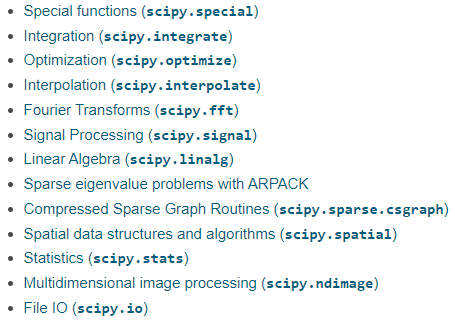
<center><b> Figure 1: SciPy functionality [5]</b></center>
<br>

The scipy.stats module houses statistics functions and contains a large number of probability distributions, summary and frequency statistics, correlation functions and statistical tests, masked statistics, kernel density estimation, quasi-Monte Carlo functionality, and more [6]. In this notebook scipy.stats will be used to demonstrate some common statistical hypothesis testing, the 2 sample t test and ANOVA testing.

# 2) Hypothesis testing
***
In statistics of data is collected (sampled) and through inferential statistics is used to make predictions about the population paramater based on the sample statistic. 
 
A hypothesis in statistics is a premise or claim that we want to test or investigate. To test the hypothesis the sampled data is used and through statistical methods the hypothesis is investigated. For example, to prove that multiple machines make a part with the same dimensions, the hypothesis would be; all machines make parts with the same dimensions. Then  using statistical methods this hypothesis can be tested. The fundemental parts of hypothesis testing are the null and alternative hypotheses.

## 2.1) Null Hypothesis  $H_{0}$
***
Null in this context is the thing that's already established. It's the currently accepted parameter. We assume the null hypothesis to be true unless the evidence suggests that we need to reject the null hypothesis.

The null hypothesis from above is that all machines produce parts with the same dimensions. 

## 2.2) Alternative Hypothesis $H_{a}$
***
Involves the claim to be tested, also called the research hypothesis.

In the example above the alternative hypothesis would be that all machines don't make parts with the same dimensions.

## 2.3) Example of the Null Hypothesis  $H_{0}$ and the Alternative Hypothesis $H_{a}$
***
It is believed that an injection moulding machine produces parts with a weight of 5g. The maintenance technician believes that after maintenance the parts no longer weigh 5g

Here are  $H_{0}$ and $H_{a}$:

* $H_{0}$: μ = 5g

* $H_{a}$: μ ≠ 5g

The null hypothesis and the alternative hypothesis are mathematically opposites meaning;

* if $H_{0}$ = x then $H_{a}$ ≠ x

* if $H_{0}$ > x then $H_{a}$ < x

Now that there is a null and alternative Hypothesis, the next steps would be to complete the hypothesis testing.

**Possible outcomes of this test**

* 1 Reject the null hypothesis - the machine no longer manufactures parts that are 5g
* 2 Fail to reject the null hypothesis - no evidence to suggest anything other than the machine makes parts that are 5g

**How is the testing done?**
Collect samples from all machines, get the means of the samples and complete the statistical testing through t-testing or ANOVA testing to determine if the machines produce parts that are statistically different.

**Statistically significance**
What is different? If samples are collected as per the following;

* sample 1 = 5.15g - easy to agree that this is close to 5g
* sample 2 = 5.72g - more subjective, is it close or not
* sample 3 = 7.23g - easy to say that this isn't close to 5g

It's quiet easy to make a conclusion that all 3 machines aren't the same. The 7.23g is much different than 5.15g. In this case there'd be no need to do statistical evaluation as the Null hypothesis could be rejected without analysis. However it's not always as obvious as this. And that's where hypothesis testing comes into play. 

To remove subjectivity and ambiguity hypothesis testing through statistical methods gives a number and based on that number the null hypothesis is either rejected or failed to be rejected.

**Level of confidence:**
As a rule of thumb 95% confidence level is used in hypothesis testing, and that's the case for this notebook.

**Level of significance:**
Level of significance is 1 - level of confidence, if the level of confidence is 95% or 0.95 then the level of significance is 1 - 0.95 = 0.05.

Both the level of confidence and the level of significance tell the same thing, it's the level of confidence that the correct decision is being made when deciding to reject the null hypothesis or fail to reject the null hypothesis.

Summarising, in hypothesis testing the first step is to form a hypothesis. Then, using statistics the hypothesis is investigated. The normally accepted is known as the null hypothesis (on average males are taller than females). The alternative is the opposite to the null and challenges the normally accepted. 

The null is based on previous studys, surveys or data collected in the past. Some new information arises and an alternative hypothesis is proposed, and this needs to be tested.

$H_{0}$ is what we believe to be true, $H_{a}$ is what we're proposing to be true and this is what we're testing. We either reject the null or fail to reject the null hypothesis.

What's interesting is that in statistics you don't have to prove the null hypothesis is true, you assume it is and you either reject it or fail to reject it. 

# 3) Two sample t-test overview
***
A common hypothesis test is the two sample t test. It is used to compare the means of two groups and to determine if the means between the groups are statistically different. It helps to answer questions like whether the average success rate is higher after implementing a new sales tool than before or whether the test results of patients who received a drug are better than test results of those who received a placebo [7].

A two sample t test is demonstrated in the following section.

## 3.1) Two sample t-test demonstration
***
A taxi company in Galway uses petrol and diesel cars. The owner is looking to reduce costs. He wants to know if the maintenance costs are higher for petrol or diesel cars. To determine this a 2 sample t-test is complete.

**Collect the data**
Repair costs are collected for 24 petrol cars and 24 diesel cars. The data collected is €/100km. To complete this example the following is complete:

* Null and alternative hypothesis are stated for the test.
* Boxplots of the data provided to visualise the data.
* Normal probability plot provided to check that the data is normally distributted.
* 2 variances test to determine if the variances are different between the repair costs for the petrol and diesel cars.
* 2 sample t-test
* Recommendation - the taxi company should use petrol or diesel cars based on maintenance costs.

### 3.1.1) Null and alternative hypothesis are stated for the test.
$H_{0}$: The average maintenence costs for petrol cars is equal to the average maintenance costs for diesel cars

$H_{a}$: The average maintenence costs for petrol cars is not equal to the average maintenance costs for diesel cars

### 3.1.2) Boxplots of the data provided to visualise the data.

In [1]:
import pandas as pd # importing pandas to read the csv file
fuel_df = pd.read_csv('Fuel.csv') # setting the dataframe to the Fuel.csv file
# setting the variables from the dataframe
fuel = fuel_df['Fuel']
cost = fuel_df['Cost']
petrol = cost[fuel == 'Petrol']
diesel = cost[fuel == 'Diesel']

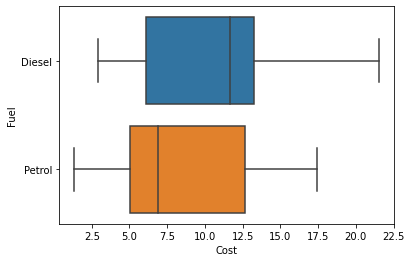

In [2]:
import seaborn as sns # importing seaborn for plots
sns.boxplot(x=cost, y=fuel) # boxplot of cost, fuel

Looking at the boxplot above it appears that the maintenance costs for petrol and diesel cars is similar, further analysis is complete to quantify this.

### 3.1.3) Normal probability plots provided to check that the data is normally distributed.

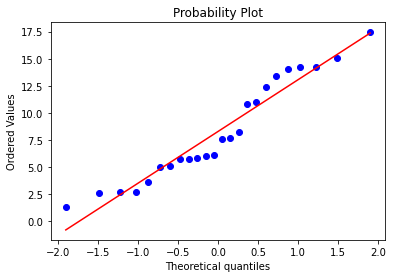


P value for Petrol from Shapiro-Wilk test: 0.10234157741069794



In [3]:
# importing plotting and stats libraries
import matplotlib.pyplot as plt
import scipy.stats as stats
# plotting normality plot for petrol data
fig = plt.figure()
ax = fig.add_subplot(111)
stats.probplot(petrol, sparams=(), dist='norm', fit=True, plot=ax, rvalue=False)
plt.show()
print(f'\nP value for Petrol from Shapiro-Wilk test: {stats.shapiro(petrol).pvalue}\n')

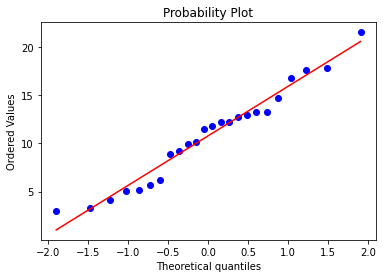


P value for Diesel from Shapiro-Wilk test: 0.5100336074829102



In [4]:
# plotting normality plot for diesel data
fig = plt.figure()
ax2 = fig.add_subplot(111)
stats.probplot(diesel, sparams=(), dist='norm', fit=True, plot=ax2, rvalue=False)
plt.show()
print('')
print(f'P value for Diesel from Shapiro-Wilk test: {stats.shapiro(diesel).pvalue}')
print('')

In the normality plots above it can be seen that both the petrol and diesel data follow an approximate straight line. This suggests that the data are from a normally distributed population. Further testing by means of the Shapiro Wilks test was also complete for both the petrol and diesel data. The results of both are greater than 0.05, this also suggests that the data are from a normally distributed population. Based on the above the conclusion is that the data is normally distributed.

### 3.1.4) 2 variances test

In [5]:
stats.levene(petrol, diesel, center='median') # 2 variances test

LeveneResult(statistic=0.0022419389285132213, pvalue=0.9624399585179602)

For the 2 variances test the levene test is used. The p-value if 0.962 is greater than the significance level which was 0.05. The result here is that we fail to reject the null hypothesis that the variability in maintenance costs for petrol cars is equal to the variability in the in maintenance costs for diesel cars. There isn't enough evidence to conclude that the variability in repair costs for the trucks is different.

### 3.1.5) 2 sample t test

In [6]:
print(stats.ttest_ind(a=petrol, b=diesel, equal_var=True)) # 2 sample t-test

Ttest_indResult(statistic=-1.797310977811207, pvalue=0.07885269344222931)


Based on the evidence provided in the 2 sample t test the conclusion is to fail to reject the null hypothesis. There's not enough evidence to suggest that there is a difference in maintenance costs between the petrol and diesel cars. The p-value of 0.0789 is greater than the significance level of 0.05. The message back to the taxi company owner is that based on maintenance costs there is no statistical difference between the petrol and diesel cars.

# 4) ANOVA overview
***
ANOVA or ANalysis Of VAriance is similar to the 2 sample t test but is typically used when the hypothesis involves more than two populations. For example if the hypothesis involves comparisons between machine a and machine b then a 2 sample t test would be typically be chosen, if the hypothesis involves comparisons between machine a, machine b and machine c, then ANOVA would typically be used for analysis. Just like with the 2 sample t test, the first step is to come up with a null and alternative hypothesis. Consider the following example.

A company uses 4 moulding machines to manufacture the same moulded component. The manufacturing engineer is comparing the tensile strength of the moulded component from all 5 machines. The manufacturing engineer randomly selects seven samples from each machine and measures their tensile strength. In order to determine if there are differences between machines and the manufacturing engineer decides to complete and ANOVA test.

To do this test a one-way ANOVA is used as only one factor or independent variable is considered. First step is to state the null and alternative hypothoses.

$H_{0}$: The mean tensile strength of the 4 machines are equal

$H_{a}$: At least one of mean tensile strengths of the 4 machines is different from the others.

ANOVA compares different sources of variation to determine whether groups are significantly different. This can be between-group and within-group variation. 

**F-statistic:** The F-statistic is a ratio of between-group and within-group variation. So when F is large, between-group variation is larger than within-group variation, which indicates a real difference between group means. When F is small, the between and within-group variations are similar, indicating that there is little or no evidence of a significant difference.

**p-value:**  The p-value is the probability of obtaining an F-statistic at least as extreme as the actual calculated value, given that the null hypothesis is true. If the p-value is greater than α, we fail to reject the null hypothesis. If the p-value is less than or equal to α, we reject the null hypothesis. The p-value from the ANOVA output is used to determine whether the main effect is statistically significant.

## 4.1) ANOVA Assumptions
***
**Assumption #1:** Your dependent variable should be continuous. Continuous Data can take any value. An example of continuous data would be; Time in a race: you could even measure it to fractions of a second.

**Assumption #2:** Your independent variable should consist of two or more categorical, independent groups. Typically, a one-way ANOVA is used when you have three or more categorical, independent groups.

**Assumption #3:** You should have independence of observations, which means that there is no relationship between the observations in each group or between the groups themselves. 

**Assumption #4:** There should be no significant outliers.

**Assumption #5:** Your dependent variable should be approximately normally distributed for each category of the independent variable.

**Assumption #6:** There needs to be homogeneity of variances. You can test this assumption using Levene's test for homogeneity of variances.

## 4.2) Loading the data and assessing the assumptions
***

In [7]:
mould_df = pd.read_csv('MouldingMachine.csv')
tensile = mould_df['Tensile'] # dependent variable
machine = mould_df['Machine'] # independent variable

## 4.2.1) Checking assumption 1
**Assumption #1:**  Your dependent variable should be continuous.

In [8]:
tensile.describe() # describing the tensile data (dependent variable)

count     40.000000
mean     220.085000
std        9.697758
min      203.810000
25%      211.580000
50%      221.485000
75%      228.390000
max      235.450000
Name: Tensile, dtype: float64

In [9]:
tensile.head() # displaying the first 5 values in the tensile data (dependent variable)

0    206.32
1    207.94
2    206.19
3    204.45
4    209.65
Name: Tensile, dtype: float64

From the data above it can be seen that the dependent varaible is continuous, therefor assumption 1 is satisfied.

### 4.2.2) Checking assumption 2
**Assumption #2:** Your independent variable should consist of two or more categorical, independent groups. Typically, a one-way ANOVA is used when you have three or more categorical, independent groups.

In [10]:
machine.describe() # describing the machine data (independent variable)

count           40
unique           4
top       Machine3
freq            10
Name: Machine, dtype: object

In [11]:
machine.head(15) # displaying the first 15 values in the machine data (dependent variable)

0     Machine1
1     Machine1
2     Machine1
3     Machine1
4     Machine1
5     Machine1
6     Machine1
7     Machine1
8     Machine1
9     Machine1
10    Machine2
11    Machine2
12    Machine2
13    Machine2
14    Machine2
Name: Machine, dtype: object

From the data above it can be seen that the independent varaible is catagorical, therefor assumption 2 is satisfied.

### 4.2.3) Checking assumption 3
**Assumption #3:** You should have independence of observations, which means that there is no relationship between the observations in each group or between the groups themselves.

There is no test for assumption 3, this is a study design issue.

### 4.2.4) Checking assumption 4
**Assumption #4:** There should be no significant outliers.

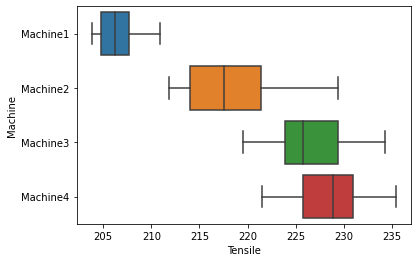

In [12]:
import seaborn as sns
sns.boxplot(x=tensile, y=machine) # plotting a boxplot to check for outliers

From the boxplot above there are no significant outliers (outliers would be evident through datapoints outside of the line at the end of the whisker. Often depicted by an asterik or a dot. Given that there is no outliers, assumption 4 is satisfied.

### 4.2.5) Checking assumption 5
**Assumption #5:** Your dependent variable should be approximately normally distributed for each category of the independent variable.

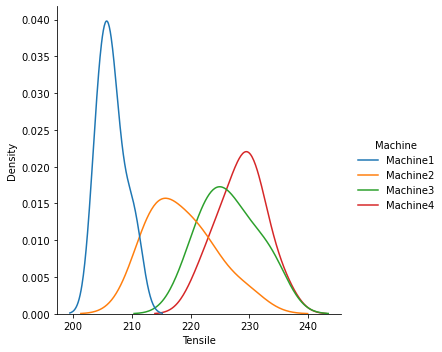

In [13]:
sns.displot(x=tensile, hue=machine, kind="kde") # distribution plot to check for normal bell shaped curvature

Looking at the kernal density plots above the data looks normal evident by the bell shaped curve. There is some skewness on machine 2 and 4 but overall the data looks reasonably normal.

In [14]:
# setting the data
tensile_machine1 = tensile[machine == 'Machine1']
tensile_machine2 = tensile[machine == 'Machine2']
tensile_machine3 = tensile[machine == 'Machine3']
tensile_machine4 = tensile[machine == 'Machine4']

In [15]:
# checking if the data passes the Shapiro-Wilk test for normality
print(stats.shapiro(tensile_machine1))
print(stats.shapiro(tensile_machine2))
print(stats.shapiro(tensile_machine3))
print(stats.shapiro(tensile_machine4))

ShapiroResult(statistic=0.9313421845436096, pvalue=0.4612235128879547)
ShapiroResult(statistic=0.9357394576072693, pvalue=0.5066492557525635)
ShapiroResult(statistic=0.965823769569397, pvalue=0.8496574759483337)
ShapiroResult(statistic=0.9821692705154419, pvalue=0.9757122993469238)


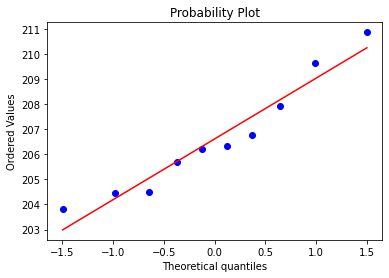


P value for Tensile from Shapiro-Wilk test: 0.4612235128879547



In [16]:
# plotting a probability plot as part of normality assessment
fig = plt.figure()
ax = fig.add_subplot(111)
stats.probplot(tensile_machine1, sparams=(), dist='norm', fit=True, plot=ax, rvalue=False)
plt.show()
print('')
print(f'P value for Tensile from Shapiro-Wilk test: {stats.shapiro(tensile_machine1).pvalue}')
print('')

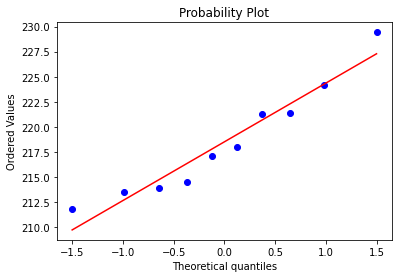


P value for Tensile from Shapiro-Wilk test: 0.5066492557525635



In [17]:
# plotting a probability plot as part of normality assessment
fig = plt.figure()
ax = fig.add_subplot(111)
stats.probplot(tensile_machine2, sparams=(), dist='norm', fit=True, plot=ax, rvalue=False)
plt.show()
print('')
print(f'P value for Tensile from Shapiro-Wilk test: {stats.shapiro(tensile_machine2).pvalue}')
print('')

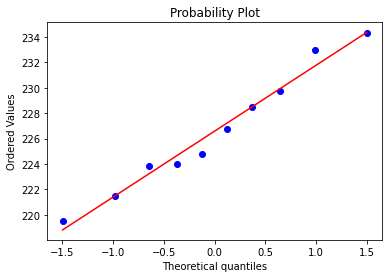


P value for Tensile from Shapiro-Wilk test: 0.8496574759483337



In [18]:
# plotting a probability plot as part of normality assessment
fig = plt.figure()
ax = fig.add_subplot(111)
stats.probplot(tensile_machine3, sparams=(), dist='norm', fit=True, plot=ax, rvalue=False)
plt.show()
print('')
print(f'P value for Tensile from Shapiro-Wilk test: {stats.shapiro(tensile_machine3).pvalue}')
print('')

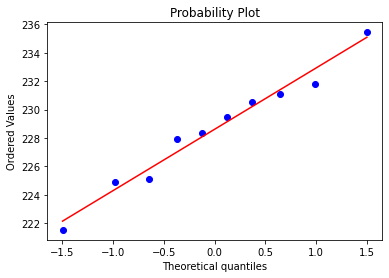


P value for Tensile from Shapiro-Wilk test: 0.9757122993469238



In [19]:
# plotting a probability plot as part of normality assessment
fig = plt.figure()
ax = fig.add_subplot(111)
stats.probplot(tensile_machine4, sparams=(), dist='norm', fit=True, plot=ax, rvalue=False)
plt.show()
print('')
print(f'P value for Tensile from Shapiro-Wilk test: {stats.shapiro(tensile_machine4).pvalue}')
print('')

Given the kernal density plots, the probability plots and the Shapiro-Wilk tests the evidence suggests that the normally distributed for each category of the independent variable.

### 4.2.6) Checking assumption 6
**Assumption #6:** There needs to be homogeneity of variances. You can test this assumption using Levene's test for homogeneity of variances.

In [20]:
# checking for homogeneity of variances
stats.levene(
    tensile_machine1,
    tensile_machine2,
    tensile_machine3,
    tensile_machine4
)

LeveneResult(statistic=2.0932275915882848, pvalue=0.11827579172462642)

For the 2 homogeneity of variances test the levene test was used. The p-value if 0.118 is greater than the significance level which was 0.05. The result here is that we fail to reject the null hypothesis that the variability in maintenance costs for petrol cars is equal to the variability in the in maintenance costs for diesel cars. There isn't enough evidence to conclude that the variability in repair costs for the moulding machines is different.

## 4.3) One-way ANOVA - Tensile by moulding machine
***
All 6 assumptions have been satisfied

In [21]:
# completing the one way ANOVA test
stats.f_oneway(
    tensile_machine1,
    tensile_machine2,
    tensile_machine3,
    tensile_machine4
)

F_onewayResult(statistic=53.0298222109013, pvalue=2.7319908034125896e-13)

A reminder of the null and alternative hypotheses:

$H_{0}$: The mean tensile strength of the 4 machines are equal

$H_{a}$: At least one of mean tensile strengths of the 4 machines is different from the others.

The results of the one-way ANOVA suggest that the null hypothesis has to be rejected because there is eveidence to suggest that at least one of mean tensile strengths of the 4 machines is different from the others. This evidence is based on the p-value which is 2.73e-13 which is much less than the significance value of 0.05. With reference to the boxplot below, it's no surprise that this is the conclusion.

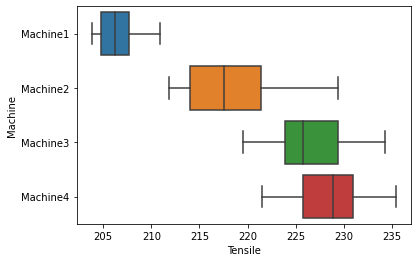

In [22]:
# boxplot to help explain the results
sns.boxplot(x=tensile, y=machine)

## 4.4) Tukey post hoc testing
***
What as confirmed so far was that at least one of mean tensile strengths of the 4 machines is different from the others. The Post hoc (“after this” in Latin) tests are used to uncover specific differences between three or more group means when an analysis of variance (ANOVA) is complete. Tukey is the method used in this notebook.

In [23]:
# Post hoc testing to uncover specific differences between the 4 machines
from statsmodels.stats.multicomp import pairwise_tukeyhsd
tukey = pairwise_tukeyhsd(endog=tensile,
                          groups=machine,
                          alpha=0.05)

# display results
print(tukey)

  Multiple Comparison of Means - Tukey HSD, FWER=0.05   
 group1   group2  meandiff p-adj   lower   upper  reject
--------------------------------------------------------
Machine1 Machine2   11.902  0.001  6.6795 17.1245   True
Machine1 Machine3   19.974  0.001 14.7515 25.1965   True
Machine1 Machine4   22.008  0.001 16.7855 27.2305   True
Machine2 Machine3    8.072  0.001  2.8495 13.2945   True
Machine2 Machine4   10.106  0.001  4.8835 15.3285   True
Machine3 Machine4    2.034 0.7007 -3.1885  7.2565  False
--------------------------------------------------------


With reference to above, when using Tukey's method it was possible to compare each of the pairs of machines. It can be seen that the only two machines that pass Tukeys test are Machine 3 and Machine 4. Again with reference to the boxplots above it can be seen that Machines 3 and 4 are the most similar.

## 4.5 Completing an ANOVA on dataset from work
***
In this section of the notebook the approach was to look at a familar process and to do an ANOVA. Data was collected from 4 machines running the same part. The length of the component was the dependent variable and the tower where it was manufactured was the independent variable.

### 4.5.1) Loading the data and assessing the assumptions

In [24]:
tower_df = pd.read_csv('Tower.csv') # setting the dataframe from Tower.csv
length = tower_df['BodyLength'] # dependent variable
tower = tower_df['Tower'] # independent variable

### 4.5.2) Checking assumption 1
**Assumption #1:**  Your dependent variable should be continuous.

In [25]:
length.describe() # describing the dependent variable - length

count    96.000000
mean     41.086469
std       0.225152
min      40.272000
25%      41.017000
50%      41.130000
75%      41.234500
max      41.410000
Name: BodyLength, dtype: float64

In [26]:
length.head() # first 5 values of the dependent variable - length

0    41.079
1    41.094
2    41.010
3    41.068
4    41.077
Name: BodyLength, dtype: float64

### 4.5.3)  Checking assumption 2
**Assumption #2:** Your independent variable should consist of two or more categorical, independent groups. Typically, a one-way ANOVA is used when you have three or more categorical, independent groups.

In [27]:
tower.describe() # describing the independent variable - tower

count         96
unique         4
top       Tower3
freq          24
Name: Tower, dtype: object

In [28]:
tower.head() # first 5 values of the dependent variable - length

0    Tower4
1    Tower4
2    Tower4
3    Tower4
4    Tower4
Name: Tower, dtype: object

From the data above it can be seen that the independent varaible is catagorical, therefor assumption 2 is satisfied.

### 4.5.4) Checking assumption 3
**Assumption #3:** You should have independence of observations, which means that there is no relationship between the observations in each group or between the groups themselves.

There is no test for assumption 3, this is a study design issue.

### 4.5.5)  Checking assumption 4
**Assumption #4:** There should be no significant outliers.

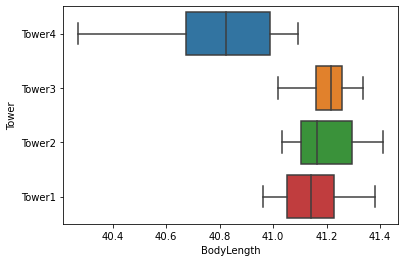

In [29]:
sns.boxplot(x=length, y=tower) # boxplot to check for outliers

From the boxplot above there are no significant outliers (outliers would be evident through datapoints outside of the line at the end of the whisker. Often depicted by an asterik or a dot. Given that there is no outliers, assumption 4 is satisfied.

### 4.5.6) Checking assumption 5
**Assumption #5:** Your dependent variable should be approximately normally distributed for each category of the independent variable.

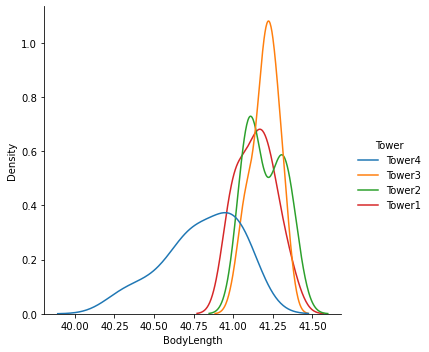

In [30]:
sns.displot(x=length, hue=tower, kind="kde") # distribution plot as part of normality assessment

Looking at the kernal density plots above the data there are some concerning signs. That double peak on Tower 2 and the skewed tail on Tower 4. Further testing is completed below to test for normality.

In [31]:
# setting the data
tower1 = length[tower == 'Tower1']
tower2 = length[tower == 'Tower2']
tower3 = length[tower == 'Tower3']
tower4 = length[tower == 'Tower4']

In [32]:
# testing for normality using the Shapiro-Wilks method
print(stats.shapiro(tower1))
print(stats.shapiro(tower2))
print(stats.shapiro(tower3))
print(stats.shapiro(tower4))

ShapiroResult(statistic=0.9688609838485718, pvalue=0.6389403343200684)
ShapiroResult(statistic=0.9200692772865295, pvalue=0.05861504375934601)
ShapiroResult(statistic=0.9667876362800598, pvalue=0.5886967778205872)
ShapiroResult(statistic=0.9276311993598938, pvalue=0.0863054022192955)


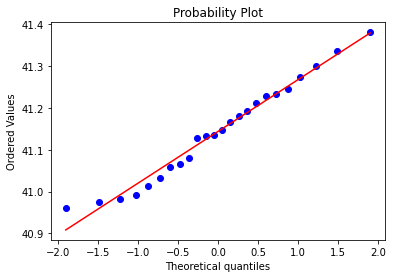


P value for Tensile from Shapiro-Wilk test: 0.6389403343200684



In [33]:
# probability plot as part of normality assessment
fig = plt.figure()
ax = fig.add_subplot(111)
stats.probplot(tower1, sparams=(), dist='norm', fit=True, plot=ax, rvalue=False)
plt.show()
print('')
print(f'P value for Tensile from Shapiro-Wilk test: {stats.shapiro(tower1).pvalue}')
print('')

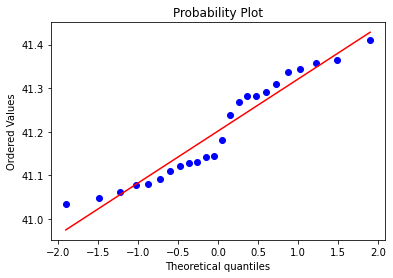


P value for Tensile from Shapiro-Wilk test: 0.05861504375934601



In [34]:
# probability plot as part of normality assessment
fig = plt.figure()
ax = fig.add_subplot(111)
stats.probplot(tower2, sparams=(), dist='norm', fit=True, plot=ax, rvalue=False)
plt.show()
print('')
print(f'P value for Tensile from Shapiro-Wilk test: {stats.shapiro(tower2).pvalue}')
print('')

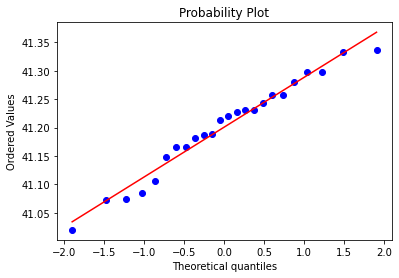


P value for Tensile from Shapiro-Wilk test: 0.5886967778205872



In [35]:
# probability plot as part of normality assessment
fig = plt.figure()
ax = fig.add_subplot(111)
stats.probplot(tower3, sparams=(), dist='norm', fit=True, plot=ax, rvalue=False)
plt.show()
print('')
print(f'P value for Tensile from Shapiro-Wilk test: {stats.shapiro(tower3).pvalue}')
print('')

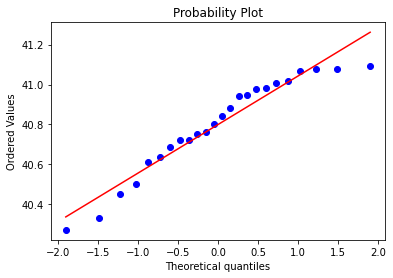


P value for Tensile from Shapiro-Wilk test: 0.0863054022192955



In [36]:
# probability plot as part of normality assessment
fig = plt.figure()
ax = fig.add_subplot(111)
stats.probplot(tower4, sparams=(), dist='norm', fit=True, plot=ax, rvalue=False)
plt.show()
print('')
print(f'P value for Tensile from Shapiro-Wilk test: {stats.shapiro(tower4).pvalue}')
print('')

Given the kernal density plots, the probability plots and the Shapiro-Wilk tests the evidence suggests that the normally distributed for each category of the independent variable.

### 4.5.7)  Checking assumption 6
**Assumption #6:** There needs to be homogeneity of variances. You can test this assumption using Levene's test for homogeneity of variances.

In [37]:
# testing for homogeneity of variances of 4 towers
stats.levene(
    tower1,
    tower2,
    tower3,
    tower4
)

LeveneResult(statistic=9.754606290607795, pvalue=1.1888229170348983e-05)

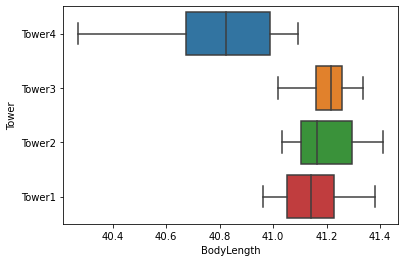

In [38]:
sns.boxplot(x=length, y=tower) # boxplot showing the variances

For the homogeneity of variances test the levene test was used. The p-value if 1.188e-05 is less than the significance level which was 0.05. The result here is that we must reject the null hypothesis that the variability from the towers is equal. There is enough evidence to conclude that the variability in the towers is different.

In the interest of learning the plan is to continue without Tower 4 and to do an ANOVA on Towers 1, 2 and 3. Assumptions 1 to 4 still stand and the levene test for the three remaining towers is complete:

In [39]:
# testing for homogeneity of variances of 3 towers
stats.levene(
    tower1,
    tower2,
    tower3,
)

LeveneResult(statistic=2.5224220839680656, pvalue=0.08764400623272083)

By dropping Tower 4 from the study the homogeneity of variances test is passed. The p-value of 0.087 is greater than the significance level which was 0.05. The result here is that we fail to reject the null hypothesis that the variability between towers 1, 2 and 3 is equal. There isn't enough evidence to conclude that the variability in the three towers is different.

## 4.6) One-way ANOVA - Lenght by Tower
***
All 6 assumptions have been satisfied

In [40]:
# one way ANOVA 
stats.f_oneway(
    tower1,
    tower2,
    tower3,
)

F_onewayResult(statistic=2.259699188189894, pvalue=0.11205378890020147)

A reminder of the null and alternative hypotheses:

$H_{0}$: The mean length of the 3 towers are equal

$H_{a}$: At least one of the mean length of the 3 towers is different from the others.

The results of the one-way ANOVA is to fail to reject the null hypothesis because the p value of 0.112 is greater than the significance level of 0.05.

## 4.7) Tukey post hoc testing
***
What as confirmed so far was that at least one of mean tensile strengths of the 4 machines is different from the others. The Post hoc (“after this” in Latin) tests are used to uncover specific differences between three or more group means when an analysis of variance (ANOVA) is complete. Tukey is the method used in this notebook.

In [41]:
#Post hoc testing using tukey's method
from statsmodels.stats.multicomp import pairwise_tukeyhsd
tukey = pairwise_tukeyhsd(endog=length,
                          groups=tower,
                          alpha=0.05)

#display results
print(tukey)

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
Tower1 Tower2    0.058 0.5466 -0.0569  0.1728  False
Tower1 Tower3   0.0572 0.5567 -0.0577   0.172  False
Tower1 Tower4  -0.3443  0.001 -0.4591 -0.2294   True
Tower2 Tower3  -0.0008    0.9 -0.1157  0.1141  False
Tower2 Tower4  -0.4022  0.001 -0.5171 -0.2873   True
Tower3 Tower4  -0.4014  0.001 -0.5163 -0.2865   True
----------------------------------------------------


With reference to above, when using Tukey's method it was possible to compare each of the pairs of machines. For this part and as part of learning the 4 machines were left in for the study. This further demonstrates the point that Tower 4 is different than the other 3 towers.

# 3) Summary
***
The purpose of this notebook is to complete some hypothesis testing using ANOVA (analysis of variance) and the scipy.stats Python library. 

To start with, the notebook provides an overview of the scipy.stats Python library, what it is, where it came from and where it is used. It's also shown that scipy.stats is just one part of the scipy Python library but is the part of interest for this notebook. 

It's important to get some background statistical information before getting to hypothesis testing using ANOVA and that's what's provided in the next section of this notebook. This information will be useful as this progress and includes details on the null and alternative hypotheses, how hypothesis testing is complete, statistical significance, level of coinfidence and level of significance. There are some worked examples demonstrating the workings of the aformentioned detail included in this section.

With some background statistical information provided the next section looks at two sample t-testing. In this section an overview and demonstration of two sample t-testing is provided. In the demonstration, a taxi company wants to reduce costs and needs to know if the maintenance costs are higher for petrol or diesel cars. In the example, the null and alternative hypothesis are stated along with boxplots, normal probability plots, a 2 variances test and finally a 2 sample t-test.

Having looked at the two sample t-test, it's time to get to the main event, that being the ANOVA. ANOVA is detailed in the next section. The section starts with an overview of ANOVA, concepts such as the F-statistic and the p-value are explained. An important part of ANOVA is the assumptions and these are covered in the next section. In this notebook there are 6 assumptions included and discussed.

With the background on ANOVA complete the next section completes and ANOVA on a theoretical data set which consists of 4 moulding machines and 4 sets of tensile data results (one set of data per machine). The example checks the assumptions before completing the ANOVA, boxplots, distribution plots and probability plots are used to aid the explanation as the notebook works through the assumptions. 

With all assumptions passed the ANOVA is complete, the results show that at least one of mean tensile strengths of the 4 machines is different from the others. Some post hoc (“after this” in Latin) tests are then used to uncover specific differences between the 4 sets of data.

A second ANOVA is then complete using data obtained from my workplace. It's good to use familar data when learning a new concept as the process/data is familar and relatable. In this example 4 machines are considered as the independent variable and bodylength the dependent variable. Once again the 6 assumptions are pre-requisite to completing the ANOVA. In this example there's a problem with assumption 6 "homogeneity of variances". 

For the homogeneity of variances test the levene test was used. The p-value if 1.188e-05 is less than the significance level which was 0.05. The result here is that we must reject the null hypothesis that the variability from the towers is equal. There is enough evidence to conclude that the variability in the towers is different. For learning purposes it was decided to continue with the ANOVA but using 3 machines instead of 4 and dropping "Tower 4". Using the 3 machines the ANOVA is complete and followed up with some post hoc testing by way of a Tukey test.

# 4) Conclusion
***
Having an interest in statistics made this assessment enjoyable, challenging and rewarding. It was interesting to see the power of the python scipy.stats library whereby using a few lines of code, hypothesis testing such as the 2 sample t-tests or ANOVA test can be complete.

It was interesting applying some basic python functions such as .head(), .describe() when checking the dependent and independent variables, seaborn when plotting boxplots and distribution plots. However, the most interesting part of this assessment was when using the scipy.stats library. The following includes some of the scipy.stats functionality that was used in this notebook;

* stats.shapiro - checking for normal distribution
* stats.probplot - checking for normal distribution
* stats.levene - checking for homogenity of variances 
* stats.ttest_ind - completing 2 sample t-test 
* stats.f_oneway - completing the ANOVA testing 
* Statsmodels.stats - completing the tukey post hoc test 

The goal of this assessment was to provide an overview of the scipy.stats Python library and complete an example hypothesis test using ANOVA. This goal has been satisfied and the learning along the way has been excellent. One of the biggest takeaways is the power of Python and the inbuilt libraries. In this notebook, only one part of one library is demonstrated, the scipy.stats (along with some bits and pieces from pandas and seaborn etc). For me I'm interested to dig a bit deeper into other libraries available that is intereting. 

Great learning around statistics also as this notebook works its way through hypothesis testing, t-test, AVOVA, tukey post hoc, significance levels, level of significance and level of confidence etc. Time was well spent working through this assessment.

# 5) References
***
[1] Python Institute; What is Python?; https://pythoninstitute.org/what-is-python/#:~:text=Python%20is%20a%20widely%2Dused,released%20on%20February%2020%2C%201991.

[2] W3Schools; NumPy Introduction; https://www.w3schools.com/python/numpy/numpy_intro.asp

[3] SciPy Organisation; Introduction; https://docs.scipy.org/doc/scipy/reference/tutorial/general.html

[4] SciPy; scipy; https://github.com/scipy/scipy

[5] SciPy; SciPy User Guide; https://scipy.github.io/devdocs/tutorial/index.html

[6] SciPy; Statistical functions (scipy.stats); https://docs.scipy.org/doc/scipy/reference/reference/stats.html#module-scipy.stats

[7] Chew Jian Chieh; MAKING SENSE OF THE TWO-SAMPLE T-TEST; https://www.isixsigma.com/tools-templates/hypothesis-testing/making-sense-two-sample-t-test/

# End
***